<a href="https://colab.research.google.com/github/ducnguyen1704/ThaoTacDuLieu/blob/master/B%C3%A0i_T%E1%BA%ADp_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Bài tập] Phân tích dữ liệu House Price – Đống Đa

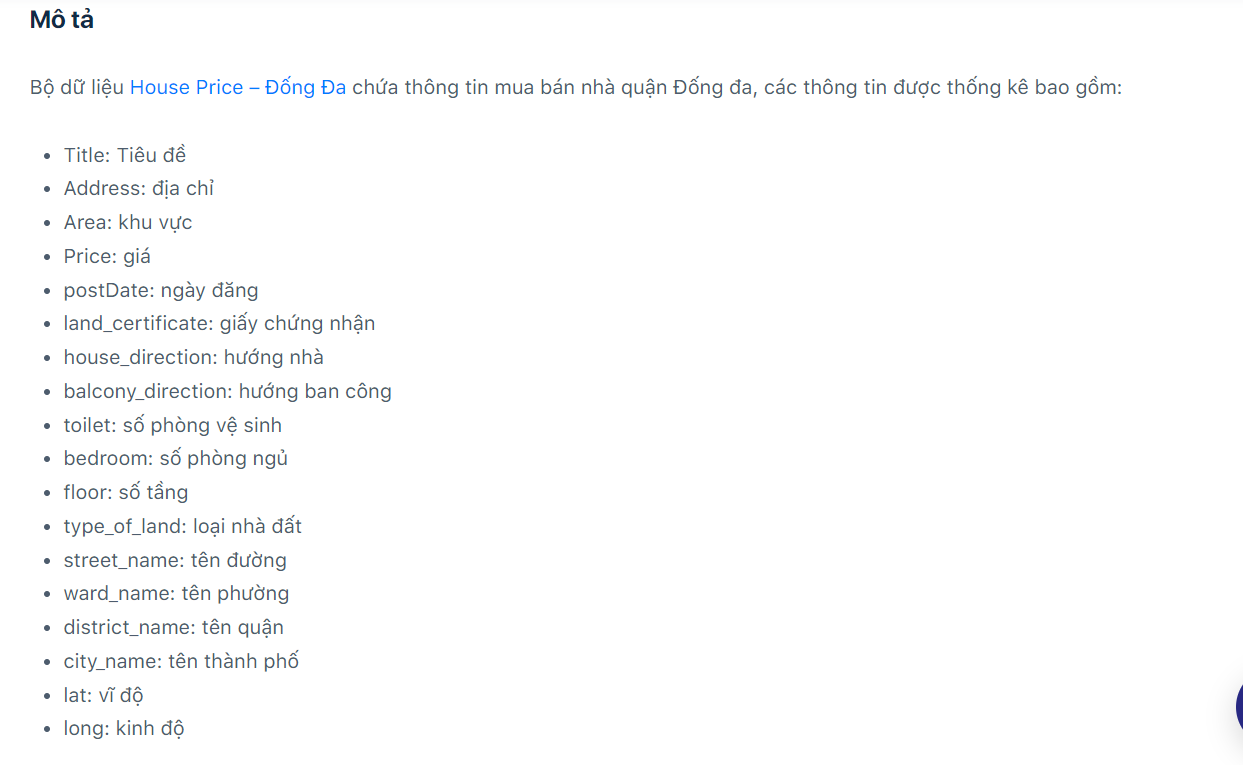

In [1]:
import pandas as pd
import numpy as np

1. Đọc bộ dữ liệu, cho biết số dòng, số cột và kiểu dữ liệu của các thuộc tính.

In [2]:
data = pd.read_excel('https://s3.ap-southeast-1.amazonaws.com/learn.codegym.vn/media/public/2022/01/08185826/house_price_do%CC%82%CC%81ng-da.xlsx')
data.head()

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,title,address,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,type_of_land,street_name,ward_name,district_name,city_name,lat,long
0,Bán nhà Trần Quang Diệu mới coong đẹp 50m2x6 t...,"Đường Trần Quang Diệu, Phường Trung Liệt, Đốn...",50.0,14700.0,2021-01-01,Sổ đỏ,NaN,NaN,4.0,6.0,6.0,Bán nhà riêng\n,Đường Trần Quang Diệu,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.015698,105.824583
1,Bán nhà mặt phố Tây Sơn - 6 tầng. Kinh doanh t...,"Đường Tây Sơn, Phường Trung Liệt, Đống Đa, Hà...",35.0,12500.0,2021-02-19,Sổ đỏ,NaN,NaN,NaN,NaN,6.0,Bán nhà mặt phố\n,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.008930,105.824105
2,Bán nhà số 36 Đoàn Kết - phố Khâm Thiên - Đống...,"Số 36 Đoàn Kết, Phố Khâm Thiên, Phường Thổ Qu...",57.0,4200.0,2021-03-10,Sổ đỏ,Nam,Nam,3.0,8.0,4.0,Bán nhà riêng\n,Phố Khâm Thiên,Phường Khâm Thiên,Quận Đống Đa,Thành phố Hà Nội,21.025208,105.833111
3,Bán nhà 6 tầng mới kinh doanh mặt ngõ 1194 Đườ...,"Ngõ 1194, Đường Láng, Phường Láng Thượng, Đố...",62.0,11000.0,2021-03-13,Sổ đỏ,Đông,Đông-Nam,6.0,5.0,6.0,Bán nhà riêng\n,Đường Láng Thượng,Phường Láng Thượng,Quận Đống Đa,Thành phố Hà Nội,21.025379,105.801011
4,"Bán nhà mặt phố Thái Hà 70m2, 5 tầng, 4.5m mặt...","Phố Thái Hà, Phường Trung Liệt, Đống Đa, Hà Nội",70.0,36000.0,2021-03-13,Sổ đỏ,NaN,NaN,NaN,6.0,5.0,Bán nhà mặt phố\n,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.009239,105.824230


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              1000 non-null   object        
 1   address            1000 non-null   object        
 2   area               994 non-null    float64       
 3   price              944 non-null    float64       
 4   postDate           1000 non-null   datetime64[ns]
 5   land_certificate   693 non-null    object        
 6   house_direction    44 non-null     object        
 7   balcony_direction  24 non-null     object        
 8   toilet             551 non-null    float64       
 9   bedroom            635 non-null    float64       
 10  floor              376 non-null    float64       
 11  type_of_land       1000 non-null   object        
 12  street_name        808 non-null    object        
 13  ward_name          802 non-null    object        
 14  district_

- Bộ dữ liệu bao gồm 1000 dòng và 18 cột
- kiểu dữ liệu bao gồm có số thực và chuỗi

2. Lọc ra các bản ghi bán nhà riêng tại phường Trung liệt hoặc phường Khâm Thiên


In [11]:
df_new = data.filter(['title','ward_name'])
df_new

,title,ward_name
0,Bán nhà Trần Quang Diệu mới coong đẹp 50m2x6 t...,Phường Trung Liệt
1,Bán nhà mặt phố Tây Sơn - 6 tầng. Kinh doanh t...,Phường Trung Liệt
2,Bán nhà số 36 Đoàn Kết - phố Khâm Thiên - Đống...,Phường Khâm Thiên
3,Bán nhà 6 tầng mới kinh doanh mặt ngõ 1194 Đườ...,Phường Láng Thượng
4,"Bán nhà mặt phố Thái Hà 70m2, 5 tầng, 4.5m mặt...",Phường Trung Liệt
...,...,...
995,"Bán nhà mặt phố Yên Lãng, Đống Đa, 65m2, 5T, 1...",Phường Láng Hạ
996,"Bán nhà 5 tầng đep MP Yên Lãng giá rẻ, DT 60m2...",Phường Trung Liệt
997,MẶT PHỐ XÃ ĐÀN - KINH DOANH ĐỈNH CAO - 6 TẦNG ...,Phường Ô Chợ Dừa
998,"Bán nhà mặt hồ Văn Chương, Đống Đa 33m2, 6 tần...",Phường Văn Chương


In [13]:
data[(data['ward_name']=='Phường Khâm Thiên')|(data['ward_name']=='Phường Trung Liệt')]

,title,address,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,type_of_land,street_name,ward_name,district_name,city_name,lat,long
0,Bán nhà Trần Quang Diệu mới coong đẹp 50m2x6 t...,"Đường Trần Quang Diệu, Phường Trung Liệt, Đốn...",50.0,14700.0,2021-01-01,Sổ đỏ,NaN,NaN,4.0,6.0,6.0,Bán nhà riêng\n,Đường Trần Quang Diệu,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.015698,105.824583
1,Bán nhà mặt phố Tây Sơn - 6 tầng. Kinh doanh t...,"Đường Tây Sơn, Phường Trung Liệt, Đống Đa, Hà...",35.0,12500.0,2021-02-19,Sổ đỏ,NaN,NaN,NaN,NaN,6.0,Bán nhà mặt phố\n,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.008930,105.824105
2,Bán nhà số 36 Đoàn Kết - phố Khâm Thiên - Đống...,"Số 36 Đoàn Kết, Phố Khâm Thiên, Phường Thổ Qu...",57.0,4200.0,2021-03-10,Sổ đỏ,Nam,Nam,3.0,8.0,4.0,Bán nhà riêng\n,Phố Khâm Thiên,Phường Khâm Thiên,Quận Đống Đa,Thành phố Hà Nội,21.025208,105.833111
4,"Bán nhà mặt phố Thái Hà 70m2, 5 tầng, 4.5m mặt...","Phố Thái Hà, Phường Trung Liệt, Đống Đa, Hà Nội",70.0,36000.0,2021-03-13,Sổ đỏ,NaN,NaN,NaN,6.0,5.0,Bán nhà mặt phố\n,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.009239,105.824230
19,"Bán gấp Tập thể chùa Bộc giá 2,6 tỷ, DT 110m2,...","Chùa Bộc, Phường Trung Liệt, Quận Đống Đa, Hà Nội",110.0,2600.0,2021-01-01,Sổ đỏ,NaN,NaN,2.0,2.0,NaN,"Tập thể, cư xá",Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.008069,105.827262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,Mặt phố Khâm Thiên - Lô góc - kinh doanh bất c...,"Phố Khâm Thiên, Phường Khâm Thiên, Đống Đa, Hà...",50.0,14500.0,2021-05-09,NaN,NaN,NaN,NaN,6.0,6.0,Bán nhà mặt phố\n,Phố Khâm Thiên,Phường Khâm Thiên,Quận Đống Đa,Thành phố Hà Nội,21.017288,105.836411
975,"Bán gấp nhà ngõ Đặng Tiến Đông, Trần Quang Diệ...","Đường Đặng Tiến Đông, Phường Trung Liệt, Đống...",35.0,4500.0,2021-05-09,Sổ đỏ,Tây-Nam,Tây-Nam,NaN,4.0,5.0,Bán nhà riêng\n,Đường Đặng Tiến Đông,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.014549,105.821232
987,"Cực hiếm! Bán nhà mặt phố Chùa Bộc, Đống Đa, k...","Phố Chùa Bộc, Phường Trung Liệt, Đống Đa, Hà Nội",143.0,72000.0,2021-05-09,Sổ đỏ,NaN,NaN,6.0,6.0,5.0,Bán nhà mặt phố\n,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.009239,105.824230
988,"Mặt phố kinh doanh sầm uất Nguyẽn Van Tuyét,...","Đường Nguyễn Văn Tuyết, Phường Trung Liệt, Đố...",76.0,30500.0,2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,Bán nhà mặt phố\n,Đường Nguyễn Văn Tuyết,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.009533,105.820193


3. Lọc các thông tin Địa chỉ, Giá, Hướng nhà, Hướng ban công của các bản ghi có giấy chứng nhận sổ đỏ và có 3 phòng ngủ trở lên.

In [16]:
data_2 = data[['address','price','house_direction','balcony_direction','land_certificate','bedroom']]
data_2

,address,price,house_direction,balcony_direction,land_certificate,bedroom
0,"Đường Trần Quang Diệu, Phường Trung Liệt, Đốn...",14700.0,NaN,NaN,Sổ đỏ,6.0
1,"Đường Tây Sơn, Phường Trung Liệt, Đống Đa, Hà...",12500.0,NaN,NaN,Sổ đỏ,NaN
2,"Số 36 Đoàn Kết, Phố Khâm Thiên, Phường Thổ Qu...",4200.0,Nam,Nam,Sổ đỏ,8.0
3,"Ngõ 1194, Đường Láng, Phường Láng Thượng, Đố...",11000.0,Đông,Đông-Nam,Sổ đỏ,5.0
4,"Phố Thái Hà, Phường Trung Liệt, Đống Đa, Hà Nội",36000.0,NaN,NaN,Sổ đỏ,6.0
...,...,...,...,...,...,...
995,"Đường Yên Lãng, Phường Láng Hạ, Đống Đa, Hà...",17500.0,NaN,NaN,Sổ đỏ,6.0
996,"Đường Yên Lãng, Phường Trung Liệt, Đống Đa, ...",17500.0,NaN,NaN,NaN,NaN
997,"Phố Xã Đàn, Phường Ô Chợ Dừa, Đống Đa, Hà Nội",24800.0,NaN,NaN,NaN,NaN
998,"Hồ Văn Chương, Phường Văn Chương, Quận Đống Đa...",8100.0,NaN,NaN,Sổ đỏ,3.0


In [17]:
data_2[(data_2['land_certificate'] == 'Sổ đỏ')&(data_2['bedroom'] >= 3)]

,address,price,house_direction,balcony_direction,land_certificate,bedroom
0,"Đường Trần Quang Diệu, Phường Trung Liệt, Đốn...",14700.0,NaN,NaN,Sổ đỏ,6.0
2,"Số 36 Đoàn Kết, Phố Khâm Thiên, Phường Thổ Qu...",4200.0,Nam,Nam,Sổ đỏ,8.0
3,"Ngõ 1194, Đường Láng, Phường Láng Thượng, Đố...",11000.0,Đông,Đông-Nam,Sổ đỏ,5.0
4,"Phố Thái Hà, Phường Trung Liệt, Đống Đa, Hà Nội",36000.0,NaN,NaN,Sổ đỏ,6.0
5,"Phố Chùa Bộc, Phường Quang Trung, Đống Đa, Hà Nội",13500.0,NaN,NaN,Sổ đỏ,3.0
...,...,...,...,...,...,...
989,"Phố Xã Đàn, Phường Kim Liên, Đống Đa, Hà Nội",3900.0,NaN,NaN,Sổ đỏ,3.0
990,"Thịnh Quang, Phường Thịnh Quang, Quận Đống Đa,...",3700.0,NaN,NaN,Sổ đỏ,4.0
991,"Thịnh Quang, Phường Thịnh Quang, Quận Đống Đa,...",4100.0,NaN,NaN,Sổ đỏ,4.0
995,"Đường Yên Lãng, Phường Láng Hạ, Đống Đa, Hà...",17500.0,NaN,NaN,Sổ đỏ,6.0


4. Với mỗi loại nhà đất, tính trung bình cộng giá cũng như giá lớn nhất và giá nhỏ nhất.

In [23]:
# trung bình cộng
data.groupby('type_of_land')['price'].mean()

type_of_land
Bán nhà mặt phố         38816.227869
Bán nhà mặt phố\n       77905.654762
Bán nhà riêng            6052.253968
Bán nhà riêng\n         10959.577959
Bất động sản khác       18492.222222
Bất động sản khác\n     23437.000000
Chung cư                 2011.864407
Tập thể, cư xá           2094.637681
Đất thổ cư              10585.000000
Name: price, dtype: float64

In [24]:
# Giá trị lớn nhất
data.groupby('type_of_land')['price'].max()

type_of_land
Bán nhà mặt phố          500000.0
Bán nhà mặt phố\n       3300000.0
Bán nhà riêng             36000.0
Bán nhà riêng\n          120000.0
Bất động sản khác         32000.0
Bất động sản khác\n       52000.0
Chung cư                  10000.0
Tập thể, cư xá             8200.0
Đất thổ cư                24500.0
Name: price, dtype: float64

In [25]:
# Giá trị nhỏ nhất
data.groupby('type_of_land')['price'].min()

type_of_land
Bán nhà mặt phố            4.5
Bán nhà mặt phố\n       5950.0
Bán nhà riêng            780.0
Bán nhà riêng\n         1400.0
Bất động sản khác         30.0
Bất động sản khác\n     9870.0
Chung cư                 530.0
Tập thể, cư xá           450.0
Đất thổ cư              3680.0
Name: price, dtype: float64

5. Tính trung bình cộng số phòng ngủ, số phòng vệ sinh, số tầng của mỗi phường.

In [26]:
# tính trung bình
data.groupby('ward_name')[['bedroom','toilet','floor']].mean()

,bedroom,toilet,floor
ward_name,,,
Phường Cát Linh,3.300000,3.600000,3.818182
Phường Hàng Bột,3.200000,3.321429,4.083333
Phường Khâm Thiên,3.384615,2.863636,4.916667
Phường Khương Thượng,2.730769,2.375000,3.846154
Phường Kim Liên,3.388889,3.000000,2.909091
Phường Láng Hạ,4.519231,4.230769,5.237288
Phường Láng Thượng,5.071429,4.425532,5.051282
Phường Nam Đồng,3.961538,4.166667,4.318182
Phường Ngã Tư Sở,3.461538,3.727273,4.076923


In [27]:
# Tính lớn nhất
data.groupby('ward_name')[['bedroom','toilet','floor']].max()

,bedroom,toilet,floor
ward_name,,,
Phường Cát Linh,7.0,9.0,7.0
Phường Hàng Bột,11.0,12.0,7.0
Phường Khâm Thiên,10.0,10.0,7.0
Phường Khương Thượng,5.0,4.0,7.0
Phường Kim Liên,10.0,7.0,5.0
Phường Láng Hạ,14.0,12.0,9.0
Phường Láng Thượng,13.0,14.0,8.0
Phường Nam Đồng,17.0,17.0,7.0
Phường Ngã Tư Sở,7.0,7.0,8.0


In [28]:
# tính nhỏ nhất
data.groupby('ward_name')[['bedroom','toilet','floor']].min()

,bedroom,toilet,floor
ward_name,,,
Phường Cát Linh,1.0,1.0,1.0
Phường Hàng Bột,1.0,1.0,1.0
Phường Khâm Thiên,1.0,1.0,3.0
Phường Khương Thượng,1.0,1.0,1.0
Phường Kim Liên,1.0,1.0,1.0
Phường Láng Hạ,1.0,1.0,1.0
Phường Láng Thượng,1.0,1.0,4.0
Phường Nam Đồng,1.0,1.0,1.0
Phường Ngã Tư Sở,1.0,1.0,2.0
